<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/18_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import pandas as pd
import numpy as np

In [220]:
df = pd.read_csv('dataset_modified.csv', sep =',')
df.head() #mostra solo le prime 5 righe. se metto head(10) le prime 10...

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,occupancy_type,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Status
0,24890,2019,Sex Not Available,nopre,type1,p1,nopc,nob/c,116500,NaN,...,pr,1U,1740.0,EXP,758.0,CIB,25-34,to_inst,south,0
1,24891,2019,Male,nopre,type2,p1,nopc,b/c,206500,NaN,...,pr,1U,4980.0,EQUI,552.0,EXP,55-64,to_inst,North,1
2,24892,2019,Male,pre,type1,p1,nopc,nob/c,406500,4.56,...,pr,1U,9480.0,EXP,834.0,CIB,35-44,to_inst,south,1
3,24893,2019,Male,nopre,type1,p4,nopc,nob/c,456500,4.25,...,pr,1U,11880.0,EXP,587.0,CIB,45-54,not_inst,North,0
4,24894,2019,Joint,pre,type1,p1,nopc,nob/c,696500,4.00,...,pr,1U,10440.0,CRIF,602.0,EXP,25-34,not_inst,North,0


Quante sono le istanze contenute nel dataset?_____
Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono
“missing values”)? _____
Il dataset è bilanciato rispetto alla classe da predire?
______ (punti 1)

In [221]:
print(f'Numero righe: {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero righe: 21944
Numero colonne: 24


In [222]:
df.isnull().sum() #ci sono missing values per più istanze

,0
ID,0
year,0
Gender,0
approv_in_adv,131
loan_type,0
loan_purpose,17
open_credit,0
business_or_commercial,0
loan_amount,0
rate_of_interest,5347


In [223]:
df['Status'].value_counts() #il dataset è piuttosto bilanciato (tra una classe e l'altra c'è una differenza di circa 70 istanze che su oltre 20000 sono poche)

,count
Status,
1,11014
0,10930


Calcolare nella nuova colonna “ratio” il rapporto tra l’importo del prestito (loan
_
amount) e
il valore della proprietà (property
_
value). Calcolare il valore medio di questo rapporto in
base al numero di unità della costruzione (total
_
units). Si può affermare che maggiore è il
numero di unità, maggiore è il rapporto? (punti 2)

In [224]:
df["ratio"] = df['loan_amount'] / df['property_value']

In [225]:
df.groupby('total_units')['ratio'].mean() #osservando i valori ottenuti non si può affermare che maggiore il numero di unità maggiore è il rapporto

,ratio
total_units,
1U,0.732230
2U,0.612850
3U,0.586999
4U,0.607033


Verificare, soltanto per i richiedenti con più di 55 anni, attraverso una tabella pivot se è vero
che chi ha un reddito annuo maggiore e un credit score maggiore ha più probabilità di essere in
regola con i pagamenti (status). Per fare questa analisi discretizzare le feature income e
Credit
_
score in 5 intervalli. (punti 3)

In [226]:
df["age"].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [227]:
df['income_disc'] = pd.cut(df[(df['age'] == '55-64') | (df['age'] == '65-74') | (df['age'] == '>74')]['income'], bins=5)
df['Credit_Score_disc'] = pd.cut(df[(df['age'] == '55-64') | (df['age'] == '65-74') | (df['age'] == '>74')]['Credit_Score'], bins=5)

In [228]:
df[(df['age'] == '55-64') | (df['age'] == '65-74') | (df['age'] == '>74')].pivot_table(index='income_disc', columns='Credit_Score_disc', values='Status', aggfunc='mean')
    #in base all'analisi si può osservare che in realtà i valori sono piuttosto confrontabili. l'unica situazione in cui si ha una certezza
    #matematica che il prestito verra concesso è per l'income nella fascia massima ma con credit score minimo

/tmp/ipython-input-202765167.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df[(df['age'] == '55-64') | (df['age'] == '65-74') | (df['age'] == '>74')].pivot_table(index='income_disc', columns='Credit_Score_disc', values='Status', aggfunc='mean')


Credit_Score_disc,"(499.6, 580.0]","(580.0, 660.0]","(660.0, 740.0]","(740.0, 820.0]","(820.0, 900.0]"
income_disc,,,,,
"(-146.22, 29244.0]",0.493961,0.502497,0.480712,0.518094,0.472716
"(29244.0, 58488.0]",0.555556,0.300000,0.600000,0.375000,0.555556
"(58488.0, 87732.0]",1.000000,NaN,0.500000,0.400000,0.500000
"(116976.0, 146220.0]",NaN,0.000000,NaN,0.000000,NaN


 Si immagina che chi chiede un prestito per una proprietà che è la sua residenza primaria
(occupancy
_
type) sia più attento ad essere in regola con i pagamenti. I dati confermano
questa considerazione? Visualizzare in un opportuno grafico e soltanto per i prestiti relativi a
residenze primarie, la correlazione tra l’importo del prestito e il valore della proprietà. Quali
conclusioni si possono trarre? (punti 4)

In [229]:
import matplotlib.pyplot as plt

In [230]:
df['occupancy_type'].unique()

array(['pr', 'sr', 'ir', nan], dtype=object)

In [231]:
#non mi è chiaro se effettivamente l'esercizio sia diviso in due parti, nel caso in cui la prima andasse fatta la risolverei così
df.groupby('occupancy_type')['Status'].mean() #si può osservare, che seppure di poco in media chi chiede un prestito per la prima casa ha probabilità più alta di essere in regola con i pagamenti

,Status
occupancy_type,
ir,0.498612
pr,0.502254
sr,0.495633


Text(0, 0.5, 'valore della proprietà ($)')

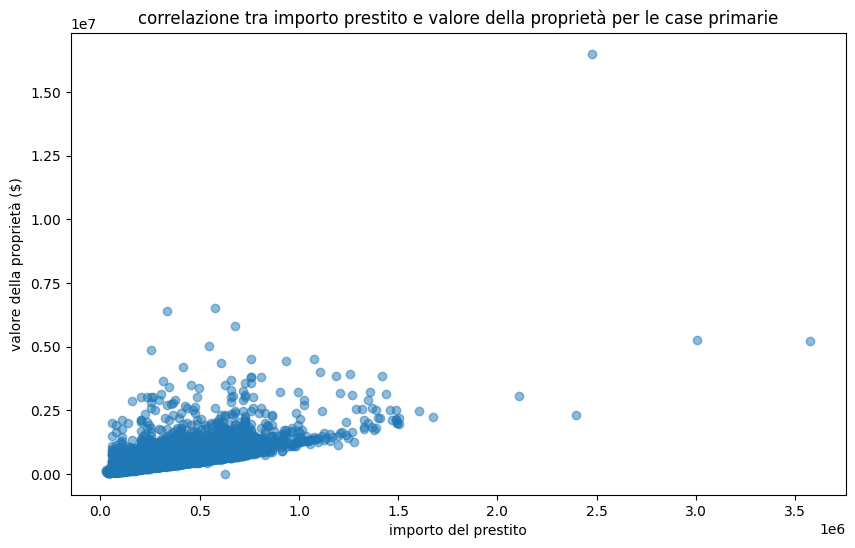

In [232]:
plt.figure(figsize=(10, 6))
plt.scatter(data=df[(df['occupancy_type'] == 'pr')], x='loan_amount', y='property_value', alpha=0.5)

# Personalizzazione del grafico
plt.title('correlazione tra importo prestito e valore della proprietà per le case primarie')
plt.xlabel('importo del prestito')
plt.ylabel('valore della proprietà ($)')

In [233]:
#la correlazione che si può osservare è che tendenzialmente con l'aumentare del valore della proprietà tenda ad aumentare l'importo del prestito in modo lineare

------------------------------
PARTE 2
------------------------------

In [234]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

Si vuole predire se il prestito è in stato di inadempimento oppure no. Ricaricare il dataset
originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare le istanze che
contengono valori nulli, trasformare opportunamente i valori categorici e dividere il dataset in
train (3/4 del dataset) e test (1/4), preservando le proporzioni delle classi nella colonna target.
Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai classificatori
ExtraTreeClassifier, KNeighborsClassifier e da un dummy classifier a scelta. Effettuare alcune
considerazioni sui risultati ottenuti, tenendo in considerazione i valori di F1 e della confusion
matrix. (punti 4)

In [235]:
df = pd.read_csv('dataset_modified.csv', sep =',')


In [236]:
#l'id è un attributo inutile, non porta nessuna informazione che possa influenzare la predizione delllo stato del prestito
df.drop('ID',axis = 1,inplace = True)
df

,year,Gender,approv_in_adv,loan_type,loan_purpose,open_credit,business_or_commercial,loan_amount,rate_of_interest,term,...,occupancy_type,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Status
0,2019,Sex Not Available,nopre,type1,p1,nopc,nob/c,116500,NaN,360.0,...,pr,1U,1740.0,EXP,758.0,CIB,25-34,to_inst,south,0
1,2019,Male,nopre,type2,p1,nopc,b/c,206500,NaN,360.0,...,pr,1U,4980.0,EQUI,552.0,EXP,55-64,to_inst,North,1
2,2019,Male,pre,type1,p1,nopc,nob/c,406500,4.560,360.0,...,pr,1U,9480.0,EXP,834.0,CIB,35-44,to_inst,south,1
3,2019,Male,nopre,type1,p4,nopc,nob/c,456500,4.250,360.0,...,pr,1U,11880.0,EXP,587.0,CIB,45-54,not_inst,North,0
4,2019,Joint,pre,type1,p1,nopc,nob/c,696500,4.000,360.0,...,pr,1U,10440.0,CRIF,602.0,EXP,25-34,not_inst,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21939,2019,Sex Not Available,nopre,type1,p3,nopc,nob/c,146500,4.250,180.0,...,pr,1U,10260.0,CIB,723.0,EXP,>74,to_inst,south,1
21940,2019,Male,pre,type2,p3,nopc,b/c,286500,3.990,360.0,...,pr,1U,8880.0,CRIF,616.0,EXP,35-44,to_inst,North,0
21941,2019,Joint,nopre,type1,p4,nopc,nob/c,266500,3.625,360.0,...,pr,1U,6240.0,EXP,768.0,EXP,45-54,to_inst,south,1
21942,2019,Female,nopre,type1,p4,nopc,nob/c,586500,NaN,360.0,...,pr,1U,10440.0,EQUI,503.0,EXP,35-44,not_inst,south,0


In [237]:
df.dropna(inplace=True)
df.shape #elimino circa 500 righe

(15333, 23)

In [238]:
df.isnull().sum()

,0
year,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
open_credit,0
business_or_commercial,0
loan_amount,0
rate_of_interest,0
term,0


In [239]:
df.dtypes

,0
year,int64
Gender,object
approv_in_adv,object
loan_type,object
loan_purpose,object
open_credit,object
business_or_commercial,object
loan_amount,int64
rate_of_interest,float64
term,float64


In [240]:
le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

In [241]:
X = df.drop('Status', axis = 1)
y = df['Status'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [242]:
models = {'Dummy': DummyClassifier(strategy="most_frequent"),
          'ExtraTree': ExtraTreeClassifier(),
          'KNN': KNeighborsClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"F1 on train {f1_score(trainlabels,trainpred)}")
  print(f"F1 on test {f1_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

 ===== Dummy =====
F1 on train 0.0
F1 on test 0.0
confusion matrix on train 
 [[5763    0]
 [5736    0]]
confusion matrix on test 
 [[1922    0]
 [1912    0]]
 ===== ExtraTree =====
F1 on train 1.0
F1 on test 0.5031152647975078
confusion matrix on train 
 [[5763    0]
 [   0 5736]]
confusion matrix on test 
 [[951 971]
 [943 969]]
 ===== KNN =====
F1 on train 0.6780017528483786
F1 on test 0.4768493879723257
confusion matrix on train 
 [[3957 1806]
 [1868 3868]]
confusion matrix on test 
 [[ 972  950]
 [1016  896]]


In [243]:
#il dummy classifier come ci potevamo immaginare performa male assegnando sempre i sample alla prima classe, porta quindi ad avere un f1 score a 0
#per quanto riguarda l'edtra tree overfitta sul training set. il che porta ad avere un risutlato non ottimale sul f1
#il knn ottiene dei risultati medi sia sul training set che sul test set

Confrontare i valori di F1 del punto precedente con quelli ottenuti con una 10 Fold cross
validation. (punti 1)

In [244]:
# cross_val_score ritorna array di score su ciascun fold
f1_scores_et = cross_val_score( ExtraTreeClassifier() ,X, y, cv=10, scoring='f1')
print("extra tree  f1 10-fold:", f1_scores_et)
print("extra tree  mean f1 10-fold:", np.mean(f1_scores_et))


f1_scores_kn = cross_val_score(KNeighborsClassifier(), X, y, cv=10, scoring='f1')
print("kn f1 10-fold:", f1_scores_kn)
print("kn f1 mean 10-fold", np.mean(f1_scores_kn))

f1_score_dc = cross_val_score(DummyClassifier(strategy="most_frequent"), X, y, cv=10, scoring='f1')
print("dummy classifier f1 10-fold:", f1_score_dc)
print("dummy classifier mean f1 10-fold", np.mean(f1_score_dc))

#osservando i risultati si osservano che i valori medi rimangono confrontabili con quelli osservati precedentemente

extra tree  f1 10-fold: [0.48441558 0.50032237 0.50293926 0.5117801  0.52190722 0.47020301
 0.51181102 0.49543677 0.50691244 0.49839435]
extra tree  mean f1 10-fold: 0.5004122126863502
kn f1 10-fold: [0.48552632 0.46845638 0.52644997 0.48456376 0.48432288 0.50594452
 0.49803408 0.49475066 0.48536109 0.508519  ]
kn f1 mean 10-fold 0.4941928647059006
dummy classifier f1 10-fold: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
dummy classifier mean f1 10-fold 0.0


Calcolare, nelle predizioni ottenute dai modelli dei classificatori ExtraTreeClassifier e
KNeighborsClassifier, la probabilità di avere un prestito in stato di inadempimento se si è donna.
La probabilità è la stessa per gli uomini? Riportare alcune considerazioni sul confronto dei due
modelli. (punti 3)

In [245]:
#considero le predizioni fatte dal ExtraTreeClassifier allenato prima
et = models['ExtraTree']
y_test_pred = et.predict(X_test)

# Creiamo un mask per le donne e gli uomini nel test set
women_mask = X_test['Gender'] == 0
men_mask   = X_test['Gender'] == 1

# Probabilità di predizione di status = 1 (percentuale di "1")
women_status_rate = y_test_pred[women_mask].mean()
men_status_rate   = y_test_pred[men_mask].mean()

print(f"Percentuale predetta di status tra le donne: {women_status_rate:.2f}")
print(f"Percentuale predetta di status tra gli uomini: {men_status_rate:.2f}")

# f1 separata per genere
women_f1 = f1_score(y_test[women_mask], y_test_pred[women_mask])
men_f1   = f1_score(y_test[men_mask], y_test_pred[men_mask])

print(f"f1 per le donne: {women_f1:.2f}")
print(f"f1 per gli uomini: {men_f1:.2f}")

#per quanto riguarda l'extra tree model:
#per le donne è più probabile che il modello predica che gli venga assegnato il prestito
#in oltre l'f1 score associato risulta essere maggiore

Percentuale predetta di status tra le donne: 0.55
Percentuale predetta di status tra gli uomini: 0.52
f1 per le donne: 0.51
f1 per gli uomini: 0.52


In [246]:
#considero le predizioni fatte dal kn allenato prima
KN = models['KNN']
y_test_pred = KN.predict(X_test)

# Creiamo un mask per le donne e gli uomini nel test set
women_mask = X_test['Gender'] == 0
men_mask   = X_test['Gender'] == 1

# Probabilità di predizione di status = 1 (percentuale di "1")
women_status_rate = y_test_pred[women_mask].mean()
men_status_rate   = y_test_pred[men_mask].mean()

print(f"Percentuale predetta di status tra le donne: {women_status_rate:.2f}")
print(f"Percentuale predetta di status tra gli uomini: {men_status_rate:.2f}")

# f1 separata per genere
women_f1 = f1_score(y_test[women_mask], y_test_pred[women_mask])
men_f1   = f1_score(y_test[men_mask], y_test_pred[men_mask])

print(f"f1 per le donne: {women_f1:.2f}")
print(f"f1 per gli uomini: {men_f1:.2f}")

#il KNeighborsClassifier al contrario invece tende ad assgnare maggiore probabilità di predirre che gli uomini abbiano prestito in stato
#di adempimento. anche l'f1 score associato agli uomini è maggiore di quello associato alle donne

Percentuale predetta di status tra le donne: 0.45
Percentuale predetta di status tra gli uomini: 0.47
f1 per le donne: 0.46
f1 per gli uomini: 0.49


Analizzare la correlazione tra le feature del dataset, creare un dataframe che contiene, oltre
alla colonna target, le 2 feature più correlate positivamente al target e le 2 feature più
correlate negativamente al target. La predizione dell’ ExtraTreeClassifier migliora? (punti 4)

In [247]:
correlation_matrix = df.corr() #Calcola la correlazione tra tutte le colonne numeriche del DataFrame df

#Seleziona le 2 feature più correlate positive
top_correlated_features_positive = correlation_matrix['Status'].sort_values(ascending=False)[1:3].index.tolist()
top_correlated_features_negative = correlation_matrix['Status'].sort_values(ascending=True)[0:2].index.tolist()
new_df = df[['Status'] + top_correlated_features_positive + top_correlated_features_negative]
new_df

,Status,loan_type,open_credit,loan_purpose,business_or_commercial
2,1,0,0,0,1
3,0,0,0,3,1
4,0,0,0,0,1
5,1,0,0,0,1
6,1,0,0,2,1
...,...,...,...,...,...
21935,1,0,0,3,1
21937,1,0,0,3,1
21939,1,0,0,2,1
21940,0,1,0,2,0


In [248]:
X_new = new_df.drop('Status', axis=1)
y_new = new_df['Status']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X_new, y_new, test_size=0.25, stratify=y_new, random_state=42
)

In [249]:
models = {'ExtraTreeClassifier': ExtraTreeClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"F1score on train {f1_score(trainlabels, trainpred)}")
  print(f"F1score on test {f1_score(testlabels, testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #le performance del extra tree tendono a migliorare leggermente, si incorre però nel problema del overfitting sul training set

 ===== ExtraTreeClassifier =====
F1score on train 1.0
F1score on test 0.5042194092827004
confusion matrix on train 
 [[5763    0]
 [   0 5736]]
confusion matrix on test 
 [[998 924]
 [956 956]]


A partire dal dataset utilizzato al punto 1, trovare i valori migliori dei parametri criterion
e max
_
depth del classificatore ExtraTreeClassifier. Come varia il valore di F1? (punti 2)

In [250]:
df = pd.read_csv('dataset_modified.csv', sep =',')
df.drop('ID',axis = 1,inplace = True)
df.dropna(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])


In [251]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 5, 10, 20, 50]
}
gd_dt = GridSearchCV(ExtraTreeClassifier(),
                     param_grid,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

gd_dt.fit(X_train, y_train)

best_parameters = gd_dt.best_params_
print(best_parameters)

best_dt = gd_dt.best_estimator_
y_test_pred_best_gd = best_dt.predict(X_test)
y_train_pred_best_gd = best_dt.predict(X_train)
f1_train_gd = f1_score(y_train, y_train_pred_best_gd)
f1_test_gd = f1_score(y_test, y_test_pred_best_gd)
print(f"F1score on train {f1_train_gd}")
print(f"F1score on test {f1_test_gd}")

#otteniamo dei risultati leggermente migliori sul test set

{'criterion': 'entropy', 'max_depth': 50}
F1score on train 1.0
F1score on test 0.5046040515653776


 Creare una pipeline in cui, a partire dal dataset utilizzato al punto 1, i valori degli attributi
income e loan
_
amount sono discretizzati in 7 intervalli, Credit
_
Score è scalato con
StandardScaler e tutti gli altri attributi sono lasciati invariati. Applicare il modello
ExtraTreeClassifier e confrontare i risultati. (punti 3)

In [252]:
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 7), ["income","loan_amount"]),
        ('std', StandardScaler(),["Credit_Score"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)

pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', ExtraTreeClassifier())
                             ])

pipeline

Pipeline(steps=[('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr',
                                                  KBinsDiscretizer(n_bins=7),
                                                  ['income', 'loan_amount']),
                                                 ('std', StandardScaler(),
                                                  ['Credit_Score'])])),
                ('estimator', ExtraTreeClassifier())])

In [253]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_f1__test_pl = f1_score(y_test, y_pred_pl)
print(f"F1score on test {y_f1__test_pl}")

#l'f1 aumenta ulterioremente di un 1%

F1score on test 0.49488323274731044


Aggiungere alla pipeline precedente la funzione TruncatedSVD per ridurre la dimensionalità
del dataset. Valutare i valori migliori di n
_
components di TruncatedSVD e dei parametri
criterion e max
_
depth di ExtraTreeClassifier, confronta i risultati con i precedenti. (punti 3)

In [254]:
# Definiamo la nuova Pipeline con SelectKBest
pipeline_best = Pipeline(steps=[
    ('preprocessing', col_tran),
    ("svd", TruncatedSVD()),
    ("estimator", ExtraTreeClassifier())
])

pipeline_best

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr',
                                                  KBinsDiscretizer(n_bins=7),
                                                  ['income', 'loan_amount']),
                                                 ('std', StandardScaler(),
                                                  ['Credit_Score'])])),
                ('svd', TruncatedSVD()), ('estimator', ExtraTreeClassifier())])

In [218]:

parameters = {
    'svd__n_components': [2, 4, 6],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_depth':[1, 2, 5, 10, 20, 50]
}


gd = GridSearchCV(pipeline_best, parameters, scoring="f1", cv=5)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)

print("Migliori parametri:", gd.best_params_)
best_pipeline = gd.best_estimator_

y_pred_gd_pl = best_pipeline.predict(X_test)
f1_best = f1_score(y_test, y_pred_gd_pl)
print("f1 del modello con i migliori parametri e svd:", f1_best)

#si può osservare dal risultato che l'f1 in test con questo ultimo approccio della pipeline aumenta ulteriormente

Migliori parametri: {'estimator__criterion': 'entropy', 'estimator__max_depth': 50, 'svd__n_components': 6}
f1 del modello con i migliori parametri e svd: 0.4904575163398693
